In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import beta, binom
from numpy.random import binomial

In [89]:
tess_db = pd.read_csv('../../TESS/new_lc/db.csv')

In [93]:
tess_db.nunique()

Unnamed: 0      8107
ID            299952
version            1
HIP            44078
TYC           209269
               ...  
e_RA_orig     297383
e_Dec_orig    297392
raddflag           3
wdflag             3
objID         299952
Length: 126, dtype: int64

In [95]:
tess_db[(tess_db['Teff'] > 6500) & (tess_db['Teff'] < 10000)]

,Unnamed: 0,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
3,3,10069883,20190415,NaN,0164-00953-1,451-034467,07210955+0001137,NaN,J072109.55+000113.7,3.110663e+18,...,NaN,1.510756,1.345070,110.289801,0.020493,0.052840,0.050174,1.0,0.0,124438797
7,7,9881558,20190415,NaN,2957-00817-1,641-041250,07214978+3810067,NaN,J072149.77+381006.8,8.998797e+17,...,NaN,1.591198,1.266344,110.457396,38.168562,0.057599,0.054961,1.0,0.0,124437612
19,19,2776520,20190415,NaN,2398-00017-1,623-023100,05222213+3431274,NaN,J052222.13+343127.5,1.828049e+17,...,NaN,1.519380,1.026822,80.592237,34.524307,0.056643,0.042021,1.0,0.0,81110974
26,26,2505046,20190415,24879.0,2398-01609-1,620-022031,05200092+3357290,NaN,J052000.91+335729.0,1.812598e+17,...,NaN,4.921253,3.403338,80.003837,33.958039,0.156631,0.133586,0.0,0.0,81013947
33,33,2849758,20190415,NaN,2390-01455-1,602-020230,05230844+3013279,NaN,J052308.44+301327.8,3.446632e+18,...,NaN,1.951987,1.218169,80.785171,30.224402,0.058416,0.044843,1.0,0.0,80546976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299732,7886,469934347,20190415,115554.0,8461-00979-1,194-196427,23242544-5116465,NaN,J232425.40-511646.6,6.501839e+18,...,NaN,0.882679,0.825540,351.105791,-51.279651,0.026175,0.031851,1.0,0.0,1724392448
299779,7933,2055570714,20190415,NaN,NaN,NaN,NaN,NaN,NaN,6.525488e+18,...,NaN,0.949354,1.372986,354.866574,-46.637662,0.026881,0.039432,1.0,0.0,1725199878
299797,7951,2054835766,20190415,NaN,NaN,NaN,NaN,NaN,NaN,6.386985e+18,...,NaN,1.611288,1.350982,356.422799,-69.683130,0.042324,0.048441,1.0,0.0,1725619354
299831,7985,2027133755,20190415,NaN,NaN,NaN,NaN,NaN,NaN,6.518815e+18,...,NaN,1.922619,2.666145,335.784723,-45.928739,0.066553,0.103774,1.0,0.0,1720114647


In [98]:
(len(af) / len(df)) * 45232

8774.299793984343

In [100]:
8774 * 0.0013

11.4062

In [71]:
af = pd.read_csv('../data/dsct.csv')
df = pd.read_csv('../data/catalogues/rev_AF_stars.csv')
df = df[df['dSct'] == 0]

In [72]:
len(af) / len(df)

0.19398434281005356

In [ ]:
0

In [73]:
df

,kic,source_id,sdss_g,parallax,parallax_error,Ag_Green_2017,Ag_Green_2017_sigma,Teffi,e_Teffi,FeHi,...,new_logg_std,new_radius,new_r_std,new_mass,new_mass_std,mass_qflag,loglbol_g_median,loglbol_sigp,loglbol_sigm,dSct
0,892667,2050232329866306176,13.405,0.821,0.015,0.43,0.03,6604,209,-0.26,...,0.10,2.26,0.16,1.46,0.25,0,0.941,0.025,0.025,0
1,892828,2050232089348573440,13.441,0.936,0.014,0.29,0.02,6685,213,-0.26,...,0.10,1.77,0.12,1.34,0.25,0,0.750,0.023,0.023,0
2,893234,2050237621266121856,13.425,1.008,0.015,0.25,0.03,6694,219,-0.37,...,0.10,1.60,0.11,1.28,0.25,0,0.665,0.021,0.022,0
3,1026133,2050236689246332928,13.314,0.826,0.018,0.32,0.04,6990,228,-0.26,...,0.10,1.94,0.15,1.46,0.25,0,0.907,0.029,0.029,0
6,1026356,2050237037150551296,15.079,0.993,0.020,0.18,0.04,6514,228,-0.28,...,NaN,0.78,0.06,0.00,0.25,6,-0.008,0.024,0.024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14324,12884399,2139314001729390720,12.793,1.760,0.019,0.18,0.03,6565,181,-0.13,...,0.12,1.24,0.08,1.14,0.25,2,0.409,0.020,0.020,0
14325,12884588,2139310501333784448,12.776,1.014,0.020,0.21,0.03,7297,255,-0.29,...,0.10,1.69,0.12,1.45,0.25,0,0.861,0.019,0.019,0
14327,12885346,2139318713311419136,13.870,0.280,0.022,0.24,0.02,9811,343,-0.14,...,0.11,2.15,0.24,2.18,0.25,0,1.587,0.073,0.068,0
14328,12934616,2139335652662315392,12.251,1.264,0.020,0.21,0.05,6601,231,0.04,...,0.10,2.19,0.17,1.44,0.25,0,0.914,0.024,0.024,0


In [3]:
N = 8774

x = np.arange(0,N)

p = 0.1271264410162131 / 100

(0.0, 100.0)

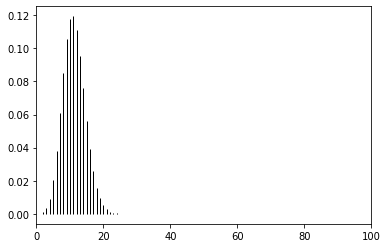

In [4]:
rv = binom(N, p)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')

plt.xlim(0, 100)

In [6]:
n_found = 0
n_search = 2354

def posterior(n_found,n_searched):
    n_not_found = n_searched-n_found
    return beta(n_found+1,n_not_found+1)

q = np.linspace(0,1,1000)
pdf = posterior(n_found,n_search).pdf(q)

(0.0, 0.1)

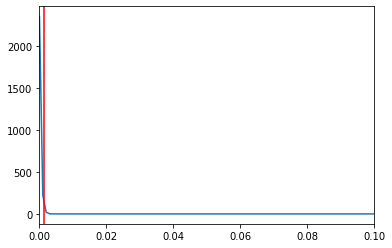

In [7]:
plt.plot(q,pdf)
plt.axvline(posterior(n_found, n_search).ppf(0.95),color='r')
plt.xlim(0, 0.1)

In [16]:
b = posterior(n_found, n_search)
samples = b.rvs(size=5000)

expected = binom(N, samples)
values = expected.rvs([1000, 5000])

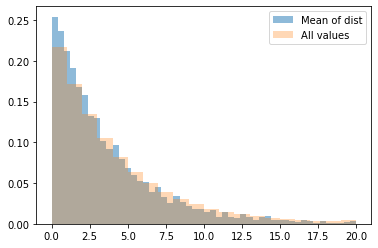

In [89]:
plt.hist(expected.mean(), bins=50, density=True, range=[0,20], alpha=0.5, label='Mean of dist'); # Dan's way
# plt.hist(np.mean(values, axis=0), bins=50, range=[0,20], density=True, alpha=0.5); # Ben's way

plt.hist(values.flatten(), bins=20, range=(0,20), alpha=0.3, density=True, label='All values');

plt.legend()

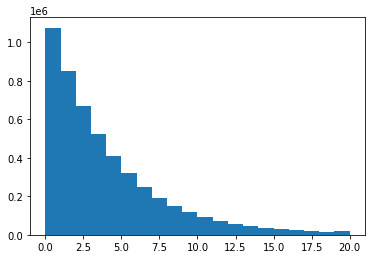

In [91]:
np.percentile(values.flatten(), [16, 50, 84])

array([0., 2., 7.])

In [68]:
np.percentile(expected.mean(), [50, 95])

array([ 2.49293211, 11.22116858])

In [69]:
np.percentile(np.mean(values, axis=0), [50, 95])

array([ 2.5   , 11.1908])

In [104]:
posterior(n_found, n_search).ppf(0.95)# * 100

0.0012712644101621309

In [15]:
import astropy.units as u

In [17]:
(2.8 * u.R_earth).to(u.R_jup)

<Quantity 0.2497997 jupiterRad>